In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the data
Data imported from link

In [ ]:
!wget https://raw.githubusercontent.com/mygit021/Machine_Learning/main/Cantone_pro/Train_Data.csv
!wget https://raw.githubusercontent.com/mygit021/Machine_Learning/main/Cantone_pro/Test_Data.csv

--2023-07-08 10:40:34--  https://raw.githubusercontent.com/mygit021/Machine_Learning/main/Cantone_pro/Train_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2700390 (2.6M) [text/plain]
Saving to: ‘Train_Data.csv.1’

Train_Data.csv.1    100%[===================>]   2.58M  --.-KB/s    in 0.1s    

2023-07-08 10:40:34 (26.9 MB/s) - ‘Train_Data.csv.1’ saved [2700390/2700390]

--2023-07-08 10:40:34--  https://raw.githubusercontent.com/mygit021/Machine_Learning/main/Cantone_pro/Test_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 

In [ ]:
train_data = pd.read_csv("/content/Train_Data.csv")
test_data = pd.read_csv("/content/Test_Data.csv")

###Inspecting Dataset

In [ ]:
print("TRAIN DATA\n\n")
print(train_data.head())
print("\n\nTEST DATA")
print(test_data.head())

TRAIN DATA


  pc      ld    m0    m1    m2       m3        m4       m5        m6       m7  \
0  y   83.71  63.0   7.2  52.5  14.0232  130.8300  12.4280  188.8425   8.9520   
1  y  108.94  31.5  12.8  84.0  13.2840  128.8350  13.5256  183.0990   8.8520   
2  E  169.65   0.0   5.6  73.5  14.5472  128.9295  13.6424  174.4680   8.9800   
3  x  122.42  31.5   7.2  63.0  15.0152  119.8575  12.3344  186.8580  10.7208   
4  E  125.43  94.5   7.2  42.0  14.4176  135.4290  14.5824  187.8135   9.3088   

         m8       m9       m10      m11       m12      m13       m14   ma  \
0  201.1905   9.2896  141.9075  16.0968  150.3390  12.4880  173.1240  m78   
1  207.2385   8.4704  154.7805  13.3304  101.0205  12.5096  131.4075  m78   
2  190.3125  11.3056  156.7650      NaN  122.5350  11.7136  176.8200  m76   
3  193.8195  10.6096  175.7490      NaN  124.8030  13.8424  168.2625  m55   
4  203.1540   9.8280  172.7040  14.4720  120.2145      NaN  150.1185  m76   

   pred  
0     0  
1     0  
2     1

In [ ]:
test_data = test_data.drop('index', axis=1)

In [ ]:
test_data.columns

Index(['pc', 'ld', 'm0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'm13', 'm14', 'ma'],
      dtype='object')

In [ ]:
train_data.columns

Index(['pc', 'ld', 'm0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'm13', 'm14', 'ma', 'pred'],
      dtype='object')

In [ ]:
print("TRAIN DATA :\n",train_data.isnull().sum())
print("TEST  DATA :\n",test_data.isnull().sum())

TRAIN DATA :
 pc         0
ld       222
m0         0
m1         0
m2         0
m3       314
m4       467
m5       576
m6       675
m7       788
m8       900
m9      1047
m10     1100
m11     1227
m12     1381
m13     1499
m14     1589
ma         0
pred       0
dtype: int64
TEST  DATA :
 pc       0
ld      28
m0       0
m1       0
m2       0
m3      67
m4      71
m5     100
m6     121
m7     149
m8     148
m9     180
m10    200
m11    241
m12    220
m13    275
m14    285
ma       0
dtype: int64


In [ ]:
train_data.skew(axis = 0, skipna = True)

<ipython-input-364-e43bddec0995>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.skew(axis = 0, skipna = True)


ld      0.947883
m0      0.694593
m1      0.476701
m2      0.587808
m3     -0.012681
m4      0.014183
m5      0.010545
m6     -0.009473
m7     -0.018630
m8      0.016980
m9     -0.009953
m10    -0.035048
m11    -0.094557
m12    -0.056440
m13     0.240490
m14    -0.051753
pred    1.381995
dtype: float64

In [ ]:
#TRAINING DATA
train_data.ld.fillna(train_data.ld.median(), inplace=True)
train_data.m3.fillna(train_data.m3.median(), inplace=True)
train_data.m4.fillna(train_data.m4.median(), inplace=True)
train_data.m5.fillna(train_data.m5.median(), inplace=True)
train_data.m6.fillna(train_data.m6.median(), inplace=True)
train_data.m7.fillna(train_data.m7.median(), inplace=True)
train_data.m8.fillna(train_data.m8.median(), inplace=True)
train_data.m9.fillna(train_data.m9.median(), inplace=True)
train_data.m10.fillna(train_data.m10.median(), inplace=True)
train_data.m11.fillna(train_data.m11.median(), inplace=True)
train_data.m12.fillna(train_data.m12.median(), inplace=True)
train_data.m13.fillna(train_data.m13.median(), inplace=True)
train_data.m14.fillna(train_data.m14.median(), inplace=True)
#TEST DATA
test_data.ld.fillna(test_data.ld.median(), inplace=True)
test_data.m3.fillna(test_data.m3.median(), inplace=True)
test_data.m4.fillna(test_data.m4.median(), inplace=True)
test_data.m5.fillna(test_data.m5.median(), inplace=True)
test_data.m6.fillna(test_data.m6.median(), inplace=True)
test_data.m7.fillna(test_data.m7.median(), inplace=True)
test_data.m8.fillna(test_data.m8.median(), inplace=True)
test_data.m9.fillna(test_data.m9.median(), inplace=True)
test_data.m10.fillna(test_data.m10.median(), inplace=True)
test_data.m11.fillna(test_data.m11.median(), inplace=True)
test_data.m12.fillna(test_data.m12.median(), inplace=True)
test_data.m13.fillna(test_data.m13.median(), inplace=True)
test_data.m14.fillna(test_data.m14.median(), inplace=True)

In [ ]:
print("TRAIN DATA :\n",train_data.isnull().sum())
print("TEST  DATA :\n",test_data.isnull().sum())

TRAIN DATA :
 pc      0
ld      0
m0      0
m1      0
m2      0
m3      0
m4      0
m5      0
m6      0
m7      0
m8      0
m9      0
m10     0
m11     0
m12     0
m13     0
m14     0
ma      0
pred    0
dtype: int64
TEST  DATA :
 pc     0
ld     0
m0     0
m1     0
m2     0
m3     0
m4     0
m5     0
m6     0
m7     0
m8     0
m9     0
m10    0
m11    0
m12    0
m13    0
m14    0
ma     0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data.pc = le.fit_transform(train_data.pc)
train_data.ma = le.fit_transform(train_data.ma)
test_data.pc = le.fit_transform(test_data.pc)
test_data.ma = le.fit_transform(test_data.ma)

In [ ]:
print("TRAIN DATA\n\n")
print(train_data.head())
print("\n\nTEST DATA")
print(test_data.head())

TRAIN DATA


   pc      ld    m0    m1    m2       m3        m4       m5        m6  \
0   3   83.71  63.0   7.2  52.5  14.0232  130.8300  12.4280  188.8425   
1   3  108.94  31.5  12.8  84.0  13.2840  128.8350  13.5256  183.0990   
2   0  169.65   0.0   5.6  73.5  14.5472  128.9295  13.6424  174.4680   
3   2  122.42  31.5   7.2  63.0  15.0152  119.8575  12.3344  186.8580   
4   0  125.43  94.5   7.2  42.0  14.4176  135.4290  14.5824  187.8135   

        m7        m8       m9       m10      m11       m12      m13       m14  \
0   8.9520  201.1905   9.2896  141.9075  16.0968  150.3390  12.4880  173.1240   
1   8.8520  207.2385   8.4704  154.7805  13.3304  101.0205  12.5096  131.4075   
2   8.9800  190.3125  11.3056  156.7650  15.3640  122.5350  11.7136  176.8200   
3  10.7208  193.8195  10.6096  175.7490  15.3640  124.8030  13.8424  168.2625   
4   9.3088  203.1540   9.8280  172.7040  14.4720  120.2145  12.5040  150.1185   

   ma  pred  
0   3     0  
1   3     0  
2   2     1  
3   0

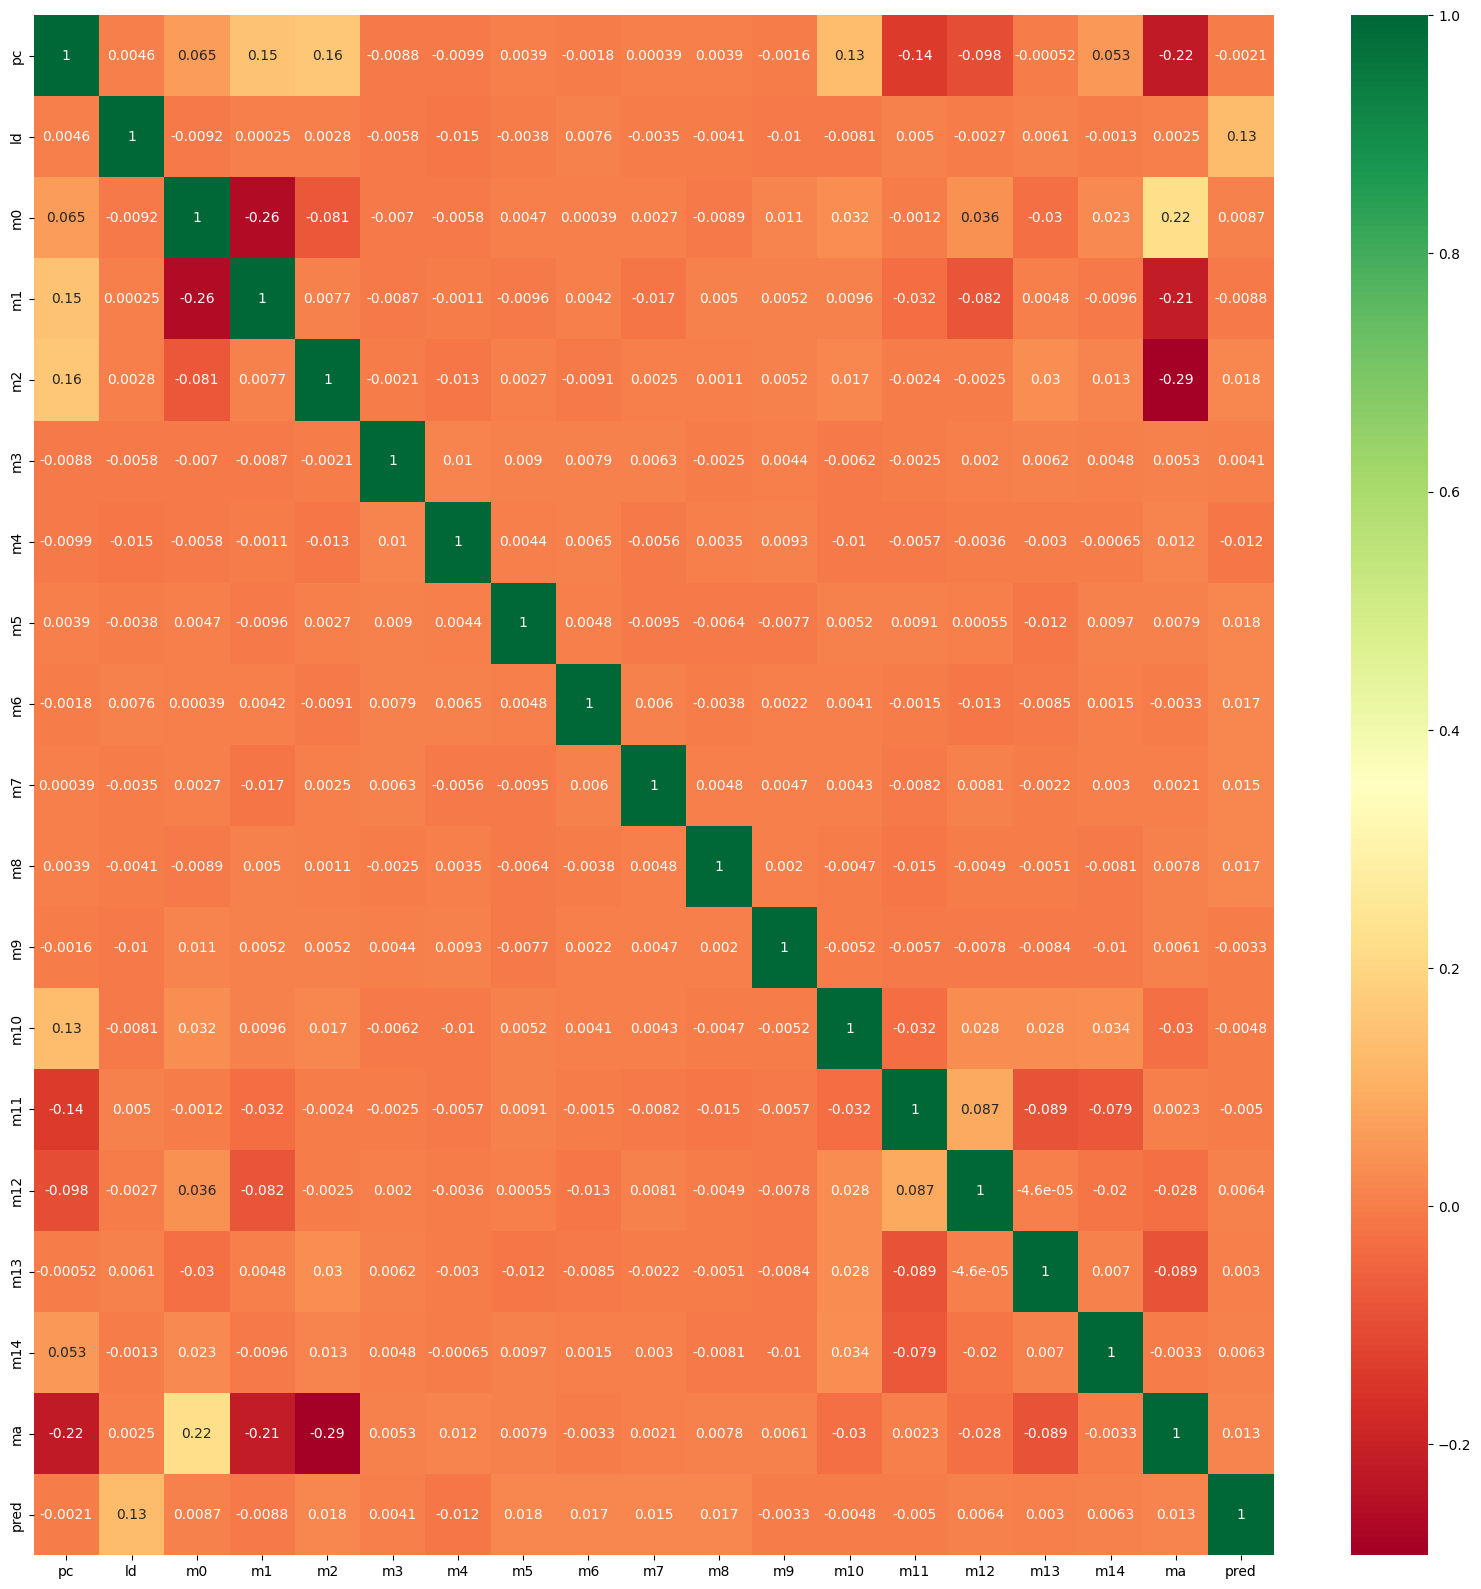

In [ ]:
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
X = train_data.drop(['pred'], axis=1)
y = train_data['pred']

In [ ]:
X.head()

,pc,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma
0,3,83.71,63.0,7.2,52.5,14.0232,130.8300,12.4280,188.8425,8.9520,201.1905,9.2896,141.9075,16.0968,150.3390,12.4880,173.1240,3
1,3,108.94,31.5,12.8,84.0,13.2840,128.8350,13.5256,183.0990,8.8520,207.2385,8.4704,154.7805,13.3304,101.0205,12.5096,131.4075,3
2,0,169.65,0.0,5.6,73.5,14.5472,128.9295,13.6424,174.4680,8.9800,190.3125,11.3056,156.7650,15.3640,122.5350,11.7136,176.8200,2
3,2,122.42,31.5,7.2,63.0,15.0152,119.8575,12.3344,186.8580,10.7208,193.8195,10.6096,175.7490,15.3640,124.8030,13.8424,168.2625,0
4,0,125.43,94.5,7.2,42.0,14.4176,135.4290,14.5824,187.8135,9.3088,203.1540,9.8280,172.7040,14.4720,120.2145,12.5040,150.1185,2


In [ ]:
# from sklearn.preprocessing import StandardScaler
# pc = X.pc
# ma = X.ma
# X = X.drop(['pc', 'ma'], axis=1)
# scaler = StandardScaler().fit(X)
# rescaledX = scaler.transform(X)
# X = pd.DataFrame(rescaledX, columns=train_data.columns[1:-2])
# X.head()


In [ ]:
# from sklearn.preprocessing import Normalizer
# scaler = Normalizer().fit(X)
# rescaledX = scaler.transform(X)
# X = pd.DataFrame(rescaledX, columns=train_data.columns[1:-2])
# X.head()

In [ ]:
# X['pc'] = pc
# X['ma'] = ma
# X.head()

In [ ]:
# from sklearn.preprocessing import StandardScaler
# pc_t = test_data.pc
# ma_t = test_data.ma
# test_data = test_data.drop(['pc', 'ma'], axis=1)
# scaler = StandardScaler().fit(test_data)
# rescaledtest_data = scaler.transform(test_data)
# test_data = pd.DataFrame(rescaledtest_data, columns=train_data.columns[1:-2])
# test_data.head()

In [ ]:
# test_data['pc'] = pc
# test_data['ma'] = ma
# test_data.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
KNN_train = accuracy_score(y_train, y_train_pred)
KNN_test = accuracy_score(y_test, y_test_pred)

In [ ]:
print("Accuracy for KNN")
print("Train dataset accuracy : ", KNN_train, "\nTest dataset accuracy : ", KNN_test)

Accuracy for KNN
Train dataset accuracy :  0.8044412134029476 
Test dataset accuracy :  0.7505702401717429


In [ ]:
print(f1_score(y_test, y_test_pred))

0.14997713763145865


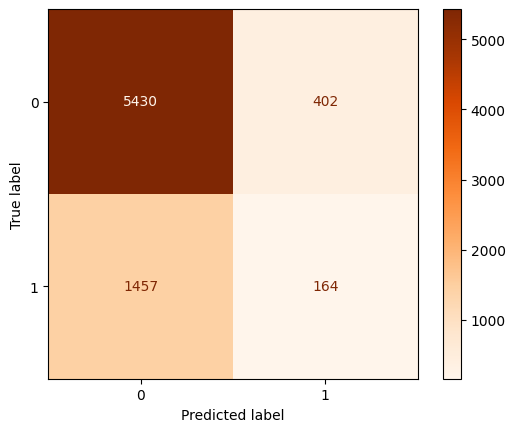

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred2 = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred2, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Oranges)
plt.grid(False)
plt.show()

In [ ]:
y_out = clf.predict(test_data)
np.savetxt('data.csv',y_out, fmt="%i")

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf2 = MultinomialNB(force_alpha=True)
clf2.fit(X_train, y_train)
y_test_pred = clf2.predict(X_test)

In [ ]:
print('Prediction Score : ',clf.score(X_test, y_test))

Prediction Score :  0.7505702401717429


In [ ]:
print(f1_score(y_test, y_test_pred))

0.30446927374301674


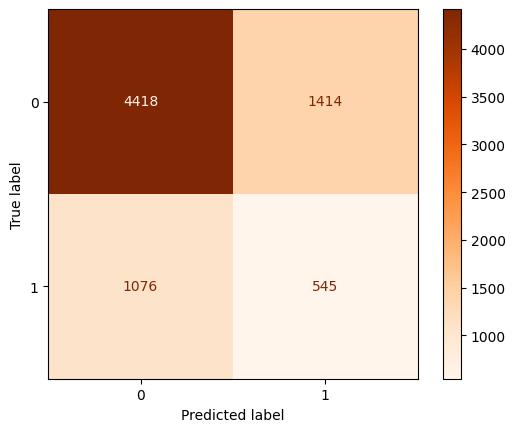

In [ ]:
y_pred2 = clf2.predict(X_test)
cm = confusion_matrix(y_test, y_pred2, labels=clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf2.classes_)
disp.plot(cmap=plt.cm.Oranges)
plt.grid(False)
plt.show()

In [ ]:
y_out2 = clf.predict(test_data)
np.savetxt('dataNB.csv',y_out2, fmt="%i")